In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

<h3>Loading Dataset</h3>

In [101]:

mydata = pd.read_csv('F:/AB_NYC_2019.csv')

mydata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h2>Dataset Cleaning and Preprocessing</h2>

In [102]:
mydata.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

<h3> We see that column Last_review is of type object. Hence we convert it into datetime type</h3>

In [103]:
mydata["last_review"] = pd.to_datetime(mydata["last_review"])
mydata.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

<h3>Checking for missing values.</h3>

In [104]:
mydata.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<h3>Few columns like host name,last review had many missing values and they were not of any importance for analysis,hence they will be deleted.<br>
Reviews per month column had a lot of missing rows but is important for analysis,hence missing values will be replaced with the mean of that column.</h3>

In [105]:
mydata['reviews_per_month'].fillna(mydata['reviews_per_month'].mean(),inplace=True)
mydata.drop(columns=['host_name', 'last_review'], axis=1, inplace=True)
mydata.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1212\2484684722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydata['reviews_per_month'].fillna(mydata['reviews_per_month'].mean(),inplace=True)


id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

<h2> Exploratory Data Analysis</h2>

<h3>Correlation</h3>

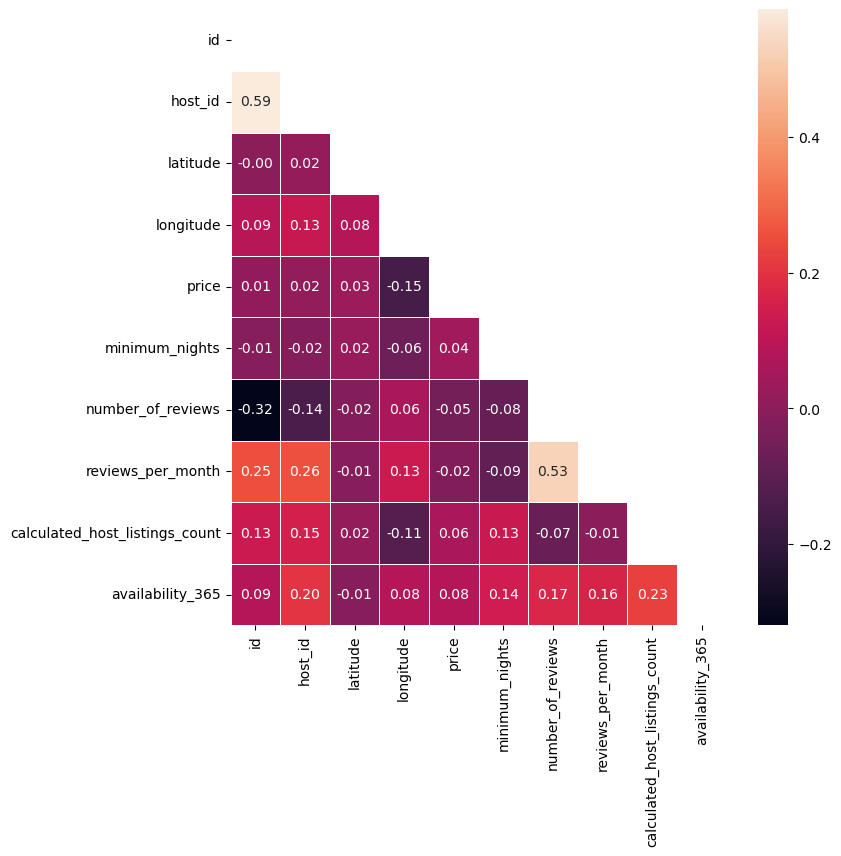

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter only numeric columns for correlation
numeric_cols = mydata.select_dtypes(include=['float64', 'int64']).columns
numeric_data = mydata[numeric_cols]

# Calculate correlation matrix with only numeric data
corr_1 = numeric_data.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

<h3>Correlation heatmap shows a high correlation between number of reviews and reviews per month. </h3>

<h3>Relation between neighbourhood group and availability</h3>

In [107]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=mydata, x="neighbourhood_group", y="availability_365")

<h3>Violin Plot shows that Staten Island has the highest mean availability value around 220-250 days compared to others</h3>

<h3>Relation between neighbourhood group and price</h3>

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(data=mydata, x='neighbourhood_group', y='price')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

<h3>Bar plot plotted between neighbourhood group and price showas that Manhattan has the most expensive prices.</h3>

<h3>Since we have latitude and longitude of each listing, let's plot it using a scatterplot</h3>

In [109]:
plt.figure(figsize=(10,6))
# Use x and y parameters instead of positional arguments
# This tells seaborn which columns to use for each axis
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=mydata)
plt.ioff()

### From the points on the map we can see that there is more density in the Brooklyn and Manhattan.

<h3> Now let's categorise rooms based on price 
Let price less than 75 dollars be low,<br>
between 75 and 500 dollars be medium and<br>
above 500 dollars be high</h3>

In [110]:
def categorise(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'
mydata['price'].apply(categorise).value_counts().plot(kind='bar');

### Most of the rooms fall in the Medium (75-500 $) category followed by Low and High range rooms.Very few people prefer to live in high priced rooms.

### Now lets analyse the names of the listings.

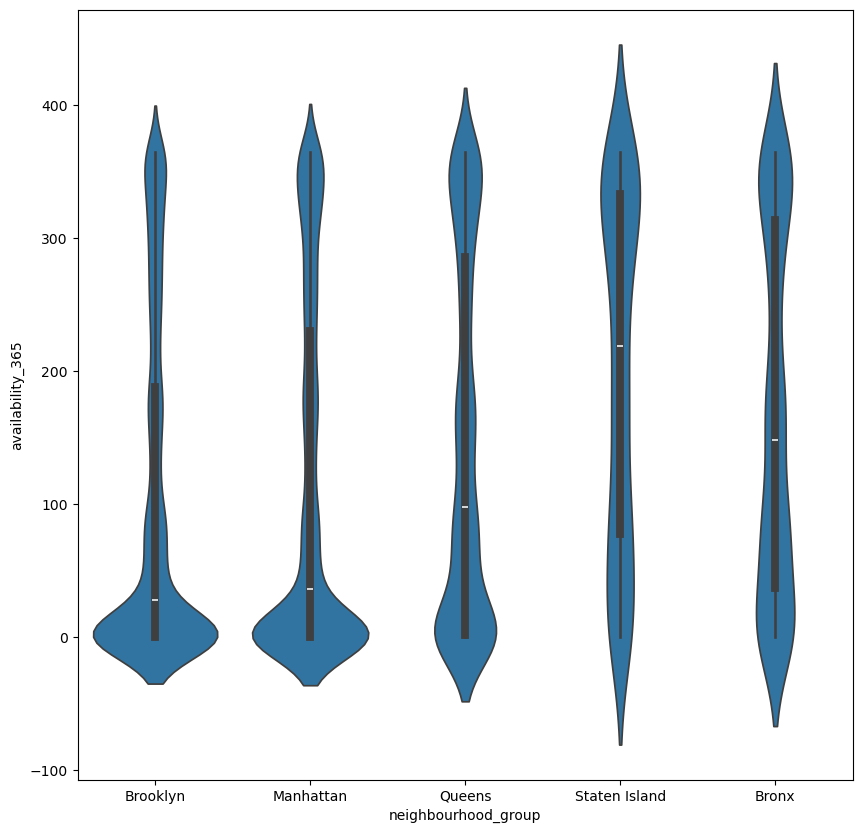

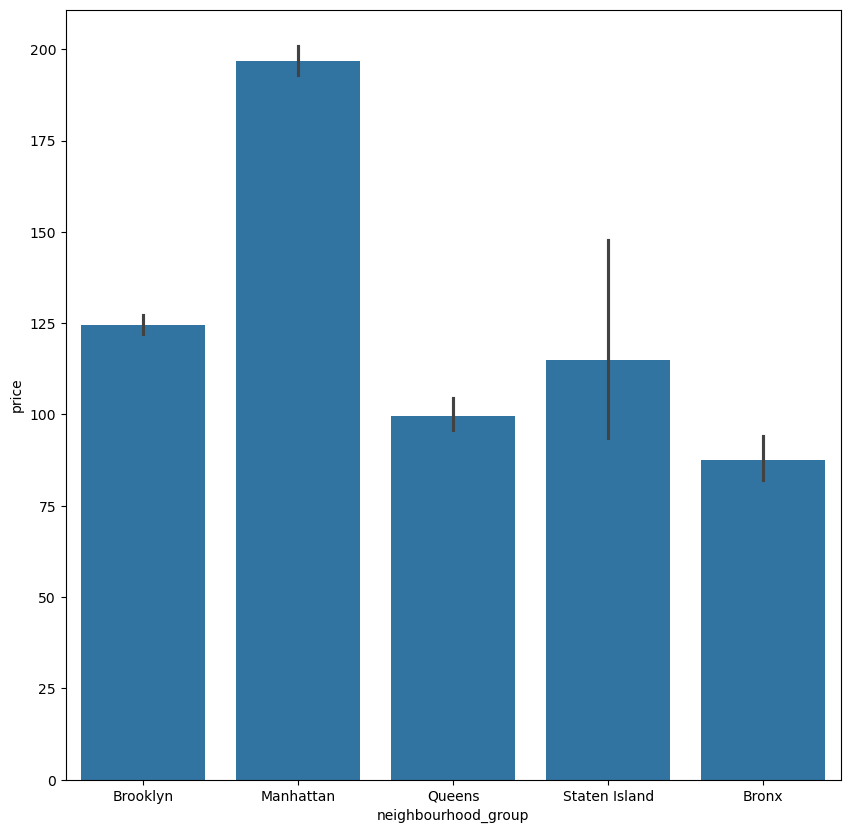

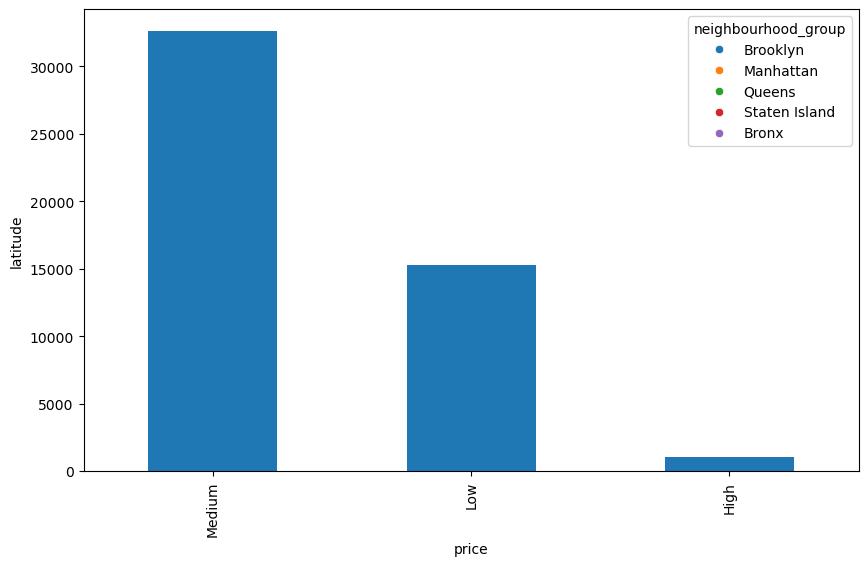

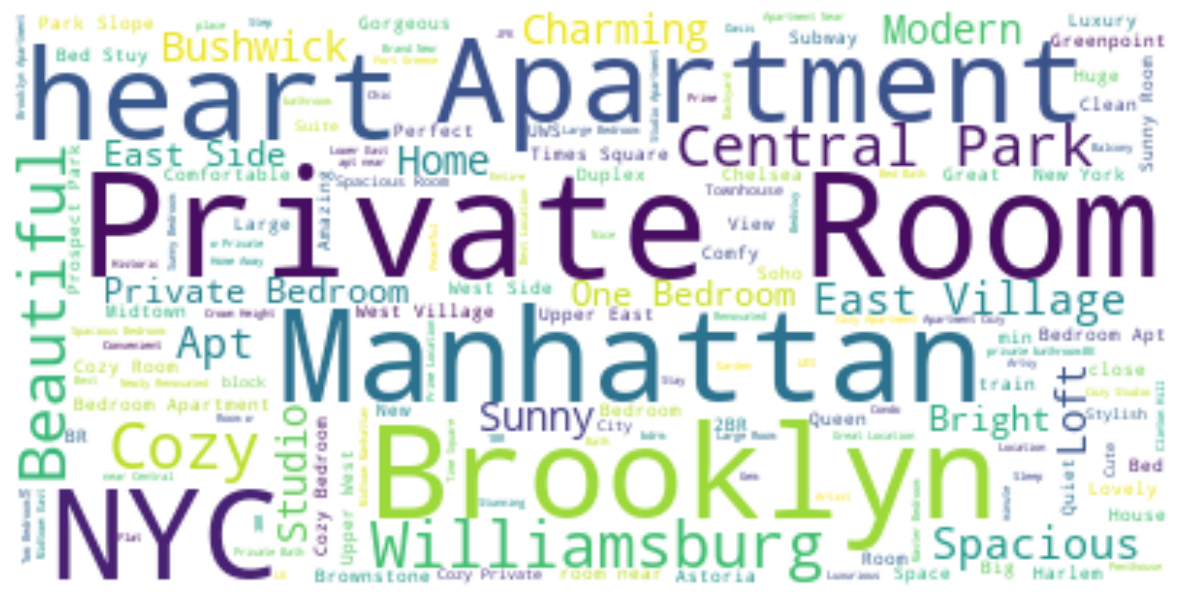

In [111]:
#word cloud

# First, install the wordcloud package
!pip install wordcloud

# Then import the required libraries
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt  # Added matplotlib import which was missing

# Create the text from your data
text = " ".join(str(each) for each in mydata.name)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)

# Only need one figure definition - removed the duplicate
plt.figure(figsize=(15,10))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Our word cloud shows the words that are more often used in the Name of this listings.We can see most of the words are related to the description,place and the experience in the room.

### Now let's analyse the number of reviews

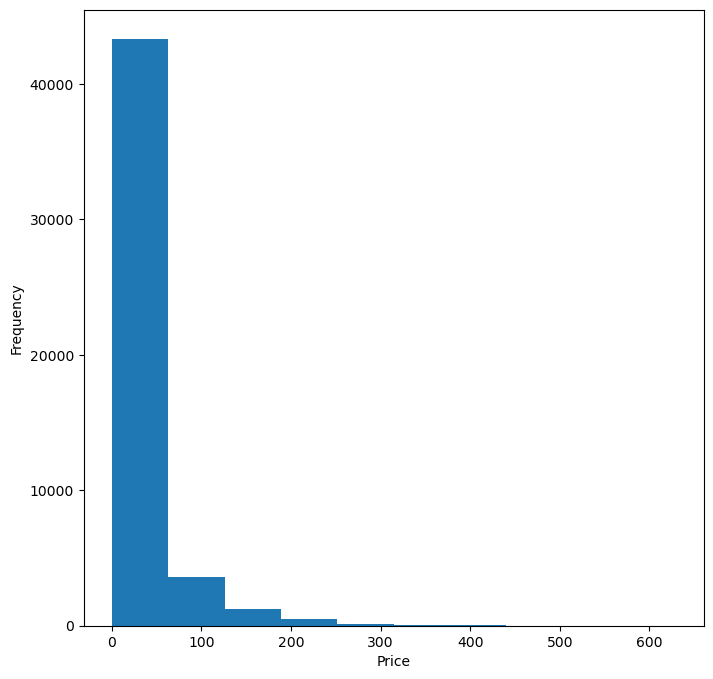

In [112]:
plt.figure(figsize=(8,8))
mydata['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

<h3> From the histogram we can see that low cost rooms or in range 0-50 $ have more reviews.This shows us that people who pay more for the rooms generally dont write reviews.It is observed people write reviews more if they are not happy with their experience.In case of costly rooms there is high possibility that the customers are happy.So they dont write much reviews.</h3>

## Models and Predictions

## Price Prediction based on name

### Let's see if we can classify a listing as cheap or expensive just based on the name

In [113]:
mydata['name'].isnull().sum()

np.int64(16)

### There are 16 names fields as NaN.Let's replace them with empty string.

In [114]:
mydata['name'].fillna('', inplace=True)
mydata['name'].isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1212\3247478832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydata['name'].fillna('', inplace=True)


np.int64(0)

### Now let's remove punctuation, digits and special characters.

In [115]:
import re
def remove_punctuation_digits_specialchar(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

mydata['clean_name'] = mydata['name'].apply(remove_punctuation_digits_specialchar)
# Let's compare raw and cleaned texts.
mydata[['name', 'clean_name']].head()

,name,clean_name
0,Clean & quiet apt home by the park,clean quiet apt home by the park
1,Skylit Midtown Castle,skylit midtown castle
2,THE VILLAGE OF HARLEM....NEW YORK !,the village of harlem new york
3,Cozy Entire Floor of Brownstone,cozy entire floor of brownstone
4,Entire Apt: Spacious Studio/Loft by central park,entire apt spacious studio loft by central park


### Now let's remove stop words

In [116]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load data (replace with your actual file)
mydata = pd.read_csv('F:/AB_NYC_2019.csv')

# Prepare stopwords
stop_words = set(stopwords.words('english'))

# Tokenization function
def tokenize_no_stopwords(line):
    # Check if the input is a string, if not return an empty string
    if not isinstance(line, str):
        return ""
    
    tokens = word_tokenize(line)
    tokens = [w.lower() for w in tokens if w.isalpha()]  # keep only words
    tokens_no_stop = [w for w in tokens if w not in stop_words]
    return " ".join(tokens_no_stop)

# Apply to dataset
# First, fill NaN values with empty strings to avoid the float error
mydata['name'] = mydata['name'].fillna("")
mydata['final_name'] = mydata['name'].apply(tokenize_no_stopwords)

print(mydata[['name', 'final_name']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               name  \
0                Clean & quiet apt home by the park   
1                             Skylit Midtown Castle   
2               THE VILLAGE OF HARLEM....NEW YORK !   
3                   Cozy Entire Floor of Brownstone   
4  Entire Apt: Spacious Studio/Loft by central park   

                         final_name  
0         clean quiet apt home park  
1             skylit midtown castle  
2           village harlem new york  
3      cozy entire floor brownstone  
4  entire apt spacious central park  


### Now lets define a price above 300 as expensive and below 300 as cheap.
### We divide dataset into 80% training and 20% as test dataset
### We use TF-IDF metric which we have learnt in class to represent the weights of each feature
### LGBM classifier is used which is similar to decision trees.

In [117]:
# First, install the lightgbm package
!pip install lightgbm

# Then run your original code
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report, mean_absolute_error, r2_score
from imblearn.over_sampling import RandomOverSampler

def classify_as_cheap_or_expensive(line):
    if line > 300:
        return 1
    else:
        return 0
        
mydata['target'] = mydata['price'].apply(classify_as_cheap_or_expensive)
mydata['target'].value_counts()
train, test = train_test_split(mydata, test_size=0.2, random_state=315, stratify=mydata['target'])

X_train, y_train = train['final_name'], train['target']
X_test, y_test = test['final_name'], test['target']
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)

# Update this line - fit_sample is deprecated, use fit_resample instead
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

lr = LGBMClassifier(random_state=315)
lr.fit(X_train_ros, y_train_ros)
preds = lr.predict(X_test)

print(classification_report(y_test, preds))
print("Accuracy: {0:.3f}".format(accuracy_score(y_test, preds)))
print("Recall: {0:.3f}".format(recall_score(y_test, preds)))

[LightGBM] [Info] Number of positive: 36430, number of negative: 36430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.285901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43671
[LightGBM] [Info] Number of data points in the train set: 72860, number of used features: 949
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      9108
           1       0.19      0.71      0.30       671

    accuracy                           0.77      9779
   macro avg       0.58      0.75      0.58      9779
weighted avg       0.92      0.77      0.83      9779

Accuracy: 0.775
Recall: 0.712


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### The scores aren't perfect but taking into account that the predicting model is built solely on textual descriptions of a listing, it seems like the words in Airbnb titles actually do matter!

In [118]:
# Option 1: Drop only the columns that exist
# First check if columns exist, then drop them
columns_to_drop = []
if 'target' in mydata.columns:
    columns_to_drop.append('target')
if 'clean_name' in mydata.columns:
    columns_to_drop.append('clean_name')
    
if columns_to_drop:  # Only drop if there are columns to drop
    mydata.drop(columns=columns_to_drop, inplace=True)

# Option 2: Alternative approach using list comprehension
mydata.drop(columns=[col for col in ['target', 'clean_name'] if col in mydata.columns], 
            inplace=True)

In [119]:
mydata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,cozy entire floor brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,entire apt spacious central park


### Now for using other models, let us first convert the categorical features into numeric by using encoding

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                            # Fit label encoder
le.fit(mydata['neighbourhood_group'])
mydata['neighbourhood_group']=le.transform(mydata['neighbourhood_group'])    # Transform labels to normalized encoding.

le = LabelEncoder()
le.fit(mydata['neighbourhood'])
mydata['neighbourhood']=le.transform(mydata['neighbourhood'])

le =LabelEncoder()
le.fit(mydata['room_type'])
mydata['room_type']=le.transform(mydata['room_type'])


mydata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,John,1,108,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,Jennifer,2,127,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,40.80902,-73.94190,1,150,3,0,NaN,NaN,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194,cozy entire floor brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0,entire apt spacious central park


## Linear Regression Model

### Prices are not normally distributed as well as there is alot of noise.Hence instead of considering y, we consider log(y)

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split  # Added missing import
from sklearn.impute import SimpleImputer  # Added for handling NaN values
import numpy as np  # Added missing import

lm = LinearRegression()
mydata = mydata[mydata.price > 0]
mydata = mydata[mydata.availability_365 > 0]

X = mydata[['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

# Handle categorical variables - convert to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  # Assuming pandas is imported as pd

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', 'most_frequent', or 'constant'
X = imputer.fit_transform(X)

# Prices are not normally distributed as well as there is alot of noise
y = np.log10(mydata['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error
y_predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test, y_predicts) * 100,
        mean_absolute_error(y_test, y_predicts)
        ))



        Mean Squared Error: 0.2399852515608522
        R2 Score: 41.216645995371394
        Mean Absolute Error: 0.17681319652580993
     


## Decision Tree model

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
from sklearn import metrics

# Change 'mse' to 'squared_error' which is the new parameter name in newer scikit-learn versions
Reg_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=0)
Reg_tree = Reg_tree.fit(X_train, y_train)

y_predicts = Reg_tree.predict(X_test)
print("median absolute deviation (MAD): ", np.mean(abs(np.multiply(np.array(y_test.T-y_predicts), np.array(1/y_test)))))
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test, y_predicts) * 100,
        mean_absolute_error(y_test, y_predicts)
        ))

median absolute deviation (MAD):  0.07953946647160069

        Mean Squared Error: 0.22889689464980484
        R2 Score: 46.52324351141027
        Mean Absolute Error: 0.16583322887806476
     


## Ridge Model

## Lasso Model

## We can see that Decision Tree model has the highest R^2 value and least error. Hence it is the best model.

In [123]:
mydata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,John,1,108,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,Jennifer,2,127,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,40.80902,-73.94190,1,150,3,0,NaN,NaN,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194,cozy entire floor brownstone
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2,137,40.74767,-73.97500,0,200,3,74,2019-06-22,0.59,1,129,large cozy br apartment midtown east


## Recommender System

### We have implemented a recommender system which suggests an airbnb listing using the keywords the user has provided. It returns the most relevant airbnb listing.

In [124]:
# First, install the fuzzywuzzy package
!pip install fuzzywuzzy python-Levenshtein

# Then import and use it
from fuzzywuzzy import process

def airbnb_finder(title):
    all_titles = mydata['final_name'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

title = airbnb_finder('village')
title

'village'